In [1]:
import numpy as np 
import pandas as pd
from os import listdir
from os.path import isfile, join, isdir
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pickle
import re
import math
from datetime import datetime, timedelta
from tests import *
from tools import *
import numpy_indexed as npi
from matplotlib.pyplot import figure

## For the Ts this performs: 
    - load prepared_filtered
    - fill gaps with season means
    - sum to half hourly
    - dump the table

In [2]:
#table should hold: 
#date,depth,final file, original value, replacement, reason

In [3]:
relevant = []
for x in allColumns: 
    if 'spare_temp_OR_volt' in x: 
        pass
    elif 'underpress_suction_plates' in x: 
        pass
    elif 'underpress_suc_plates' in x: 
        pass
    elif "air_rel_humidiy_30cm" in x: 
        pass
    elif x == "t[s]":
        pass
    else:
        relevant.append(x) 

In [4]:
#redo the % variables with a different filter
redo = []
for x in allColumns: 
    if "air_rel_humidiy_30cm" in x:
        redo.append(x)

# Combine 

In [16]:
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
timeScaled = data["t[s]"].astype('datetime64[D]').drop_duplicates().reset_index(drop= True)
pickle.dump(timeScaled, open("data_transform/prepared_daily_ts/" + "timelineDaily" + ".p", "wb"))

## Table1

In [17]:
column1 = []
for x in relevant: 
    if 'soil_temp_05cm_depth_' in x: 
        column1.append(x)

In [18]:
column2 = []
for x in relevant: 
    if 'soil_temp_15cm_depth_' in x: 
        column2.append(x)

In [19]:
container = []
container2 = []
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
timeDaily = pickle.load(open("data_transform/prepared_daily_ts/" + "timelineDaily" + ".p", "rb"))

In [19]:
for x in column1: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "halfHourly")
    c = pd.DataFrame(time30)
    c["soil_temp_05cm"] = data
    c["plotcode"] = x[21:26]
    container.append(c)

In [20]:
for x in column2: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "halfHourly")
    c = pd.DataFrame(time30)
    c["soil_temp_15cm"] = data
    c["plotcode"] = x[21:26]
    container2.append(c)

In [21]:
row1 = pd.concat(container2).reset_index(drop=True)
row2 = pd.concat(container).reset_index(drop=True)

In [22]:
final1 = row1.merge(row2,on=["plotcode",0],how="outer")

In [23]:
order = [0, "plotcode", "soil_temp_05cm", "soil_temp_15cm"]
final1 = final1[order]

In [24]:
final1.rename(columns= {0:"datetime"},inplace=True)

In [25]:
#done
final1.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv")

## Table2

In [196]:
relevant = []
for x in allColumns: 
    if 'spare_temp_OR_volt' in x: 
        pass
    elif 'underpress_suction_plates' in x: 
        pass
    elif 'underpress_suc_plates' in x: 
        pass
    elif x == "t[s]":
        pass
    else:
        relevant.append(x) 

In [197]:
columns2 = []
for x in relevant: 
    if '_2A' in x: 
        columns2.append(x)

In [198]:
container2 = {}
container2['soil_temp_05cm_depth'] = []
container2['soil_temp_15cm_depth'] = []
container2['soil_temp_60cm_depth'] = []
container2['air_temp_30cm'] = []
container2["air_rel_humidiy_30cm"] = []
container2["surface_temp_south_west"] = []
time = pickle.load(open("data_transform/prepared_filtered/" + "time" + ".p", "rb"))
timeDaily = pickle.load(open("data_transform/prepared_daily_ts/" + "timelineDaily" + ".p", "rb"))

In [199]:
for x in columns2: 
    data = pd.DataFrame(time)
    data[x] = pickle.load(open("data_transform/prepared_filtered/" + x + ".p", "rb"))
    data = time_sum(data, "daily")
    c = pd.DataFrame(timeDaily)
    if 'soil_temp_05cm_depth' in x:
        c["soil_temp_05cm"] = data
        c["plotcode"] = x[21:26]        
        container2["soil_temp_05cm_depth"].append(c)
    elif 'soil_temp_15cm_depth' in x:
        c["soil_temp_15cm"] = data
        c["plotcode"] = x[21:26]
        container2["soil_temp_15cm_depth"].append(c)
    elif 'soil_temp_60cm_depth' in x:
        c['soil_temp_60cm'] = data
        c["plotcode"] = x[21:26]
        container2["soil_temp_60cm_depth"].append(c)
    elif "air_temp_30cm" in x:
        c["air_temp_30cm"] = data
        c["plotcode"] = x[18:23]
        container2['air_temp_30cm'].append(c)
    elif "air_rel_humidiy_30cm" in x:
        c["air_rel_humidiy_30cm"] = data
        c["plotcode"] = x[25:30]
        container2["air_rel_humidiy_30cm"].append(c)
    elif "surface_temp_south_west" in x:
        c["surface_temp_south_west"] = data
        c["plotcode"] = x[24:29]
        container2["surface_temp_south_west"].append(c)
    else:
        print("ERROR!")
        print(x)

/home/stein/nextcloud/tools.py:507: RuntimeWarning: Mean of empty slice
  a = ts[:int(len(ts)/2)]


ERROR!
soil_water_tension_eT3_2A01_010[hPa]
ERROR!
soil_water_tension_eT3_2A01_020[hPa]
ERROR!
soil_water_tension_eT3_2A02_010[hPa]
ERROR!
soil_water_tension_eT3_2A02_030[hPa]
ERROR!
soil_water_tension_eT3_2A04_010[hPa]
ERROR!
soil_water_tension_eT3_2A04_030[hPa]
ERROR!
soil_water_tension_eT3_2A04_060[mV]
ERROR!
soil_water_tension_eT3_2A04_100[mV]
ERROR!
soil_water_tension_eT3_2A05_010[mV]
ERROR!
soil_water_tension_eT3_2A05_030[mV]
ERROR!
soil_water_tension_eT3_2A06_010[hPa]
ERROR!
soil_water_tension_eT3_2A06_030[hPa]
ERROR!
soil_water_tension_eT3_2A08_010[hPa]
ERROR!
soil_water_tension_eT3_2A08_030[hPa]
ERROR!
soil_water_tension_eT3_2A10_010[hPa]
ERROR!
soil_water_tension_eT3_2A10_030[hPa]


In [200]:
row1 = pd.concat(container2['soil_temp_05cm_depth']).reset_index(drop=True)
row2 = pd.concat(container2['soil_temp_15cm_depth']).reset_index(drop=True)
row3 = pd.concat(container2['soil_temp_60cm_depth']).reset_index(drop=True)
row4 = pd.concat(container2['air_temp_30cm']).reset_index(drop=True)
row5 = pd.concat(container2["air_rel_humidiy_30cm"]).reset_index(drop=True)
row6 = pd.concat(container2["surface_temp_south_west"]).reset_index(drop=True)

In [201]:
final2 = row1.merge(row2,on=["plotcode","t[s]"],how="outer")

In [202]:
final2 = final2.merge(row3,on=["plotcode","t[s]"],how="outer")
final2 = final2.merge(row4,on=["plotcode","t[s]"],how="outer")
final2 = final2.merge(row5,on=["plotcode","t[s]"],how="outer")
final2 = final2.merge(row6,on=["plotcode","t[s]"],how="outer")

In [203]:
order = ["t[s]", "plotcode", "soil_temp_05cm", "soil_temp_15cm", 'soil_temp_60cm','air_temp_30cm',"air_rel_humidiy_30cm","surface_temp_south_west"]
final2 = final2[order]

In [204]:
final2.rename(columns= {"t[s]":"datetime"},inplace=True)

In [205]:
for x in final2.columns[2:]:
    print((sum(np.isnan(final2[x]))))

23958
23274
23530
29328
22683
29808


In [206]:
#done
final2.to_csv("data_transform/prepared_daily_ts/block_2_soil_temp_daily.csv")

# Filter extreme seasonal values based on all Ts

1. calculate the mean and Quartiles for every season
2. Construct boxplot threshold
3. Threshhold filter them out
4. replace them with mean values over the plots at this point in time

## Table1

In [110]:
data = pd.read_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv")
data["datetime"] = pd.to_datetime(data["datetime"])

In [111]:
acceptRange = 1.5
Q1_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.25)
Q3_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.75)
mean_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').mean()
mean_5.rename(columns= {'soil_temp_05cm': "mean_5"},inplace=True)

In [112]:
IQR_5 = Q3_5 - Q1_5
outlier_step_5 = acceptRange * IQR_5    
mini_5 = Q1_5 - outlier_step_5
mini_5.rename(columns= {'soil_temp_05cm': "mini_5"},inplace=True)
maxi_5 = Q3_5 + outlier_step_5
maxi_5.rename(columns= {'soil_temp_05cm': "maxi_5"},inplace=True)

In [113]:
Q1_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.25)
Q3_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.75)
mean_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').mean()
mean_15.rename(columns= {'soil_temp_15cm': "mean_15"},inplace=True)

In [114]:
IQR_15 = Q3_15 - Q1_15
outlier_step_15 = acceptRange * IQR_15    
mini_15 = Q1_15 - outlier_step_15
mini_15.rename(columns= {'soil_temp_15cm': "mini_15"},inplace=True)
maxi_15 = Q3_15 + outlier_step_15
maxi_15.rename(columns= {'soil_temp_15cm': "maxi_15"},inplace=True)

In [115]:
borders5 = mini_5.merge(maxi_5,how="outer",left_index=True, right_index= True)
borders5 = borders5.merge(mean_5,how="outer",left_index=True, right_index= True)

borders15 = mini_15.merge(maxi_15,how="outer",left_index=True, right_index= True)
borders15 = borders15.merge(mean_15,how="outer",left_index=True, right_index= True)

In [116]:
borders = borders5.merge(borders15,how="outer",left_index=True, right_index= True)

In [117]:
join = data.merge(borders, how="outer", left_on="datetime", right_index= True)

In [118]:
selection1 = (join["soil_temp_05cm"] > join["maxi_5"]) | (join["soil_temp_05cm"] < join["mini_5"])
selection2 = (join["soil_temp_15cm"] > join["maxi_15"]) | (join["soil_temp_15cm"] < join["mini_15"])

In [119]:
boxplot_filter = {}
boxplot_filter["soil_temp_05cm"] = join[selection1][["mean_5","soil_temp_05cm"]]
boxplot_filter["soil_temp_15cm"] = join[selection2][["mean_15","soil_temp_15cm"]]
pickle.dump(boxplot_filter, open("data_transform/prepared_30min_ts/" + "boxplot_filtered" + ".p", "wb"))

In [47]:
print(sum(np.isnan(join["soil_temp_15cm"])))

6225328


In [48]:
join.loc[selection2,"soil_temp_15cm"] = join.loc[selection2,"mean_15"]
join.loc[selection1,"soil_temp_05cm"] = join.loc[selection1,"mean_5"]

In [49]:
print(sum(np.isnan(join["soil_temp_15cm"])))

6225328


In [50]:
join.drop(columns=["Unnamed: 0", "mini_5", "maxi_5", "mini_15", "maxi_15", "mean_5", "mean_15"],inplace= True)

In [51]:
sum(np.isnan(join["soil_temp_15cm"]))

6225328

In [52]:
#done
join.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv")

In [53]:
# OLD version would end here with a save

# Then: Fill NaNs with season means

In [54]:
join["fillings"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings"] = fullTimeLine.Mean.values

In [55]:
join["fillings2"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_30(join.loc[join["plotcode"]==x , ["datetime","soil_temp_15cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-2478]])
    join.loc[(join["plotcode"] == x), "fillings2"] = fullTimeLine.Mean.values

In [56]:
filled = {}
filled["soil_temp_05cm"] = join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"].index.values
filled["soil_temp_15cm"] = join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"].index.values
pickle.dump(filled, open("data_transform/prepared_30min_ts/" + "filled_with_season_mean" + ".p", "wb"))

In [57]:
#fill everything
join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"] =  join.loc[np.isnan(join["soil_temp_05cm"]), "fillings"].values
join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"] =  join.loc[np.isnan(join["soil_temp_15cm"]), "fillings"].values

In [58]:
sum(np.isnan(join["soil_temp_05cm"])), sum(np.isnan(join["soil_temp_15cm"]))

(0, 0)

In [59]:
#done
join.to_csv("data_transform/prepared_30min_ts/complete_soil_temp_30_min.csv")

## Table 2

In [207]:
data = pd.read_csv("data_transform/prepared_daily_ts/block_2_soil_temp_daily.csv")
data["datetime"] = pd.to_datetime(data["datetime"])
acceptRange = 1.5

In [208]:
data.columns

Index(['Unnamed: 0', 'datetime', 'plotcode', 'soil_temp_05cm',
       'soil_temp_15cm', 'soil_temp_60cm', 'air_temp_30cm',
       'air_rel_humidiy_30cm', 'surface_temp_south_west'],
      dtype='object')

In [209]:
acceptRange = 1.5
Q1_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.25)
Q3_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').quantile(0.75)
mean_5 = data[["datetime","soil_temp_05cm"]].groupby('datetime').mean()
mean_5.rename(columns= {'soil_temp_05cm': "mean_5"},inplace=True)
IQR_5 = Q3_5 - Q1_5
outlier_step_5 = acceptRange * IQR_5    
mini_5 = Q1_5 - outlier_step_5
mini_5.rename(columns= {'soil_temp_05cm': "mini_5"},inplace=True)
maxi_5 = Q3_5 + outlier_step_5
maxi_5.rename(columns= {'soil_temp_05cm': "maxi_5"},inplace=True)

In [210]:
Q1_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.25)
Q3_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').quantile(0.75)
mean_15 = data[["datetime","soil_temp_15cm"]].groupby('datetime').mean()
mean_15.rename(columns= {'soil_temp_15cm': "mean_15"},inplace=True)
IQR_15 = Q3_15 - Q1_15
outlier_step_15 = acceptRange * IQR_15    
mini_15 = Q1_15 - outlier_step_15
mini_15.rename(columns= {'soil_temp_15cm': "mini_15"},inplace=True)
maxi_15 = Q3_15 + outlier_step_15
maxi_15.rename(columns= {'soil_temp_15cm': "maxi_15"},inplace=True)

In [211]:
Q1_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').quantile(0.25)
Q3_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').quantile(0.75)
mean_60 = data[["datetime",'soil_temp_60cm']].groupby('datetime').mean()
mean_60.rename(columns= {'soil_temp_60cm': "mean_60"},inplace=True)
IQR_60 = Q3_60 - Q1_60
outlier_step_60 = acceptRange * IQR_60    
mini_60 = Q1_60 - outlier_step_60
mini_60.rename(columns= {'soil_temp_60cm': "mini_60"},inplace=True)
maxi_60 = Q3_60 + outlier_step_60
maxi_60.rename(columns= {'soil_temp_60cm': "maxi_60"},inplace=True)

In [212]:
Q1_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').quantile(0.25)
Q3_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').quantile(0.75)
mean_30 = data[["datetime",'air_temp_30cm']].groupby('datetime').mean()
mean_30.rename(columns= {'air_temp_30cm': "mean_30"},inplace=True)
IQR_30 = Q3_30 - Q1_30
outlier_step_30 = acceptRange * IQR_30    
mini_30 = Q1_30 - outlier_step_30
mini_30.rename(columns= {'air_temp_30cm': "mini_30"},inplace=True)
maxi_30 = Q3_30 + outlier_step_30
maxi_30.rename(columns= {'air_temp_30cm': "maxi_30"},inplace=True)

In [213]:
Q1_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').quantile(0.25)
Q3_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').quantile(0.75)
mean_rel = data[["datetime",'air_rel_humidiy_30cm']].groupby('datetime').mean()
mean_rel.rename(columns= {'air_rel_humidiy_30cm': "mean_rel"},inplace=True)
IQR_rel = Q3_rel - Q1_rel
outlier_step_rel = acceptRange * IQR_rel    
mini_rel = Q1_rel - outlier_step_rel
mini_rel.rename(columns= {'air_rel_humidiy_30cm': "mini_rel"},inplace=True)
maxi_rel= Q3_rel + outlier_step_rel
maxi_rel.rename(columns= {'air_rel_humidiy_30cm': "maxi_rel"},inplace=True)

In [214]:
Q1_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').quantile(0.25)
Q3_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').quantile(0.75)
mean_sur = data[["datetime",'surface_temp_south_west']].groupby('datetime').mean()
mean_sur.rename(columns= {'surface_temp_south_west': "mean_sur"},inplace=True)
IQR_sur = Q3_sur - Q1_sur
outlier_step_sur = acceptRange * IQR_sur   
mini_sur= Q1_sur - outlier_step_sur
mini_sur.rename(columns= {'surface_temp_south_west': "mini_sur"},inplace=True)
maxi_sur= Q3_sur + outlier_step_sur
maxi_sur.rename(columns= {'surface_temp_south_west': "maxi_sur"},inplace=True)

In [215]:
borders5 = mini_5.merge(maxi_5,how="outer",left_index=True, right_index= True)
borders5 = borders5.merge(mean_5,how="outer",left_index=True, right_index= True)
borders15 = mini_15.merge(maxi_15,how="outer",left_index=True, right_index= True)
borders15 = borders15.merge(mean_15,how="outer",left_index=True, right_index= True)
borders60 = mini_60.merge(maxi_60,how="outer",left_index=True, right_index= True)
borders60 = borders60.merge(mean_60,how="outer",left_index=True, right_index= True)
borders30 = mini_30.merge(maxi_30,how="outer",left_index=True, right_index= True)
borders30 = borders30.merge(mean_30,how="outer",left_index=True, right_index= True)
bordersrel = mini_rel.merge(maxi_rel,how="outer",left_index=True, right_index= True)
bordersrel = bordersrel.merge(mean_rel,how="outer",left_index=True, right_index= True)
borderssur = mini_sur.merge(maxi_sur,how="outer",left_index=True, right_index= True)
borderssur = borderssur.merge(mean_sur,how="outer",left_index=True, right_index= True)

In [216]:
borders = borders5.merge(borders15,how="outer",left_index=True, right_index= True)
borders = borders.merge(borders60,how="outer",left_index=True, right_index= True)
borders = borders.merge(borders30,how="outer",left_index=True, right_index= True)
borders = borders.merge(bordersrel,how="outer",left_index=True, right_index= True)
borders = borders.merge(borderssur,how="outer",left_index=True, right_index= True)

In [217]:
join = data.merge(borders, how="outer", left_on="datetime", right_index= True)

In [218]:
selection1 = (join["soil_temp_05cm"] > join["maxi_5"]) | (join["soil_temp_05cm"] < join["mini_5"])
selection2 = (join["soil_temp_15cm"] > join["maxi_15"]) | (join["soil_temp_15cm"] < join["mini_15"])
selection3 = (join["soil_temp_60cm"] > join["maxi_60"]) | (join["soil_temp_05cm"] < join["mini_60"])
selection4 = (join['air_temp_30cm'] > join["maxi_30"]) | (join['air_temp_30cm'] < join["mini_30"])
selection5 = (join['air_rel_humidiy_30cm'] > join["maxi_rel"]) | (join['air_rel_humidiy_30cm'] < join["mini_rel"])
selection6 = (join['surface_temp_south_west'] > join["maxi_sur"]) | (join['surface_temp_south_west'] < join["mini_sur"])

In [219]:
boxplot_filter = {}
boxplot_filter["soil_temp_05cm"] = join[selection1][["mean_5","soil_temp_05cm"]]
boxplot_filter["soil_temp_15cm"] = join[selection2][["mean_15","soil_temp_15cm"]]
boxplot_filter["soil_temp_60cm"] = join[selection3][["mean_60","soil_temp_60cm"]]
boxplot_filter['air_temp_30cm'] = join[selection4][["mean_30",'air_temp_30cm']]
boxplot_filter['air_rel_humidiy_30cm'] = join[selection5][["mean_5",'air_rel_humidiy_30cm']]
boxplot_filter['surface_temp_south_west'] = join[selection6][["mean_15",'surface_temp_south_west']]
pickle.dump(boxplot_filter, open("data_transform/prepared_30min_ts/" + "boxplot_filtered_2" + ".p", "wb"))

In [220]:
join.loc[selection1,"soil_temp_05cm"] = join.loc[selection1,"mean_5"]
join.loc[selection2,"soil_temp_15cm"] = join.loc[selection2,"mean_15"]
join.loc[selection3,"soil_temp_60cm"] = join.loc[selection3,"mean_60"]
join.loc[selection4,'air_temp_30cm'] = join.loc[selection4,"mean_30"]
join.loc[selection5,'air_rel_humidiy_30cm'] = join.loc[selection5,"mean_rel"]
join.loc[selection6,'surface_temp_south_west'] = join.loc[selection6,"mean_sur"]

In [221]:
join.drop(columns=["Unnamed: 0", "mini_5", "maxi_5", "mini_15", "maxi_15",
                   "mean_5", "mean_15", "mini_60", "maxi_60", "mini_30", "maxi_30",
                   "mean_60", "mean_30", "mini_rel", "maxi_rel", "mini_sur", "maxi_sur",
                   "mean_rel", "mean_sur"],inplace= True)

# Then: Fill NaNs with season means

In [222]:
join["fillings"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings"] = fullTimeLine.Mean.values

In [223]:
join["fillings2"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings2"] = fullTimeLine.Mean.values

In [224]:
join["fillings3"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings3"] = fullTimeLine.Mean.values

In [225]:
join["fillings4"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings4"] = fullTimeLine.Mean.values

In [226]:
join["fillings5"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings5"] = fullTimeLine.Mean.values

In [227]:
join["fillings6"] = np.nan
for x in list(set(join["plotcode"])):
    mean, leap = get_season_means_daily(join.loc[join["plotcode"]==x , ["datetime","soil_temp_05cm" ]])
    leapYear = pd.concat([mean[((mean["datetime"] < '2003-3-01'))],leap,mean[((mean["datetime"] >= '2003-3-01'))]])
    cycle = pd.concat([mean,leapYear,mean, mean])
    fullTimeLine = pd.concat([cycle,cycle,cycle,cycle,mean,leapYear[:-51]])
    join.loc[(join["plotcode"] == x), "fillings6"] = fullTimeLine.Mean.values

In [228]:
filled = {}
filled["soil_temp_05cm"] = join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"].index.values
filled["soil_temp_15cm"] = join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"].index.values
filled["soil_temp_60cm"] = join.loc[np.isnan(join["soil_temp_60cm"]), "soil_temp_60cm"].index.values
filled['air_temp_30cm'] = join.loc[np.isnan(join['air_temp_30cm']), 'air_temp_30cm'].index.values
filled['air_rel_humidiy_30cm'] = join.loc[np.isnan(join['air_rel_humidiy_30cm']), 'air_rel_humidiy_30cm'].index.values
filled['surface_temp_south_west'] = join.loc[np.isnan(join['surface_temp_south_west']), 'surface_temp_south_west'].index.values

pickle.dump(filled, open("data_transform/prepared_30min_ts/" + "filled_with_season_mean_2" + ".p", "wb"))

In [229]:
#fill everything
join.loc[np.isnan(join["soil_temp_05cm"]), "soil_temp_05cm"] =  join.loc[np.isnan(join["soil_temp_05cm"]), "fillings"].values
join.loc[np.isnan(join["soil_temp_15cm"]), "soil_temp_15cm"] =  join.loc[np.isnan(join["soil_temp_15cm"]), "fillings2"].values
join.loc[np.isnan(join["soil_temp_60cm"]), "soil_temp_60cm"] =  join.loc[np.isnan(join["soil_temp_60cm"]), "fillings3"].values
join.loc[np.isnan(join['air_temp_30cm']), 'air_temp_30cm'] =  join.loc[np.isnan(join['air_temp_30cm']), "fillings4"].values
join.loc[np.isnan(join['air_rel_humidiy_30cm']), 'air_rel_humidiy_30cm'] =  join.loc[np.isnan(join['air_rel_humidiy_30cm']), "fillings5"].values
join.loc[np.isnan(join['surface_temp_south_west']), 'surface_temp_south_west'] =  join.loc[np.isnan(join['surface_temp_south_west']), "fillings6"].values

In [230]:
sum(np.isnan(join["soil_temp_05cm"])), sum(np.isnan(join["soil_temp_15cm"]))

(0, 0)

In [236]:
join = join.drop(columns=["fillings","fillings2","fillings3","fillings4","fillings5","fillings6"])

In [237]:
join

,datetime,plotcode,soil_temp_05cm,soil_temp_15cm,soil_temp_60cm,air_temp_30cm,air_rel_humidiy_30cm,surface_temp_south_west
0,2003-02-26,2A01M,7.060889,7.060889,7.060889,7.060889,7.060889,7.060889
6524,2003-02-26,2A02M,8.099068,8.099068,8.099068,8.099068,8.099068,8.099068
13048,2003-02-26,2A03M,7.257608,7.257608,7.257608,7.257608,7.257608,7.257608
19572,2003-02-26,2A04M,7.153997,7.153997,7.153997,7.153997,7.153997,7.153997
26096,2003-02-26,2A05M,8.194409,8.194409,8.194409,8.194409,8.194409,8.194409
...,...,...,...,...,...,...,...,...
117431,2021-01-05,2A18M,1.845360,1.845360,1.845360,1.845360,1.845360,1.845360
123955,2021-01-05,2A19M,1.588359,1.588359,1.588359,1.588359,1.588359,1.588359
130479,2021-01-05,2A20M,1.278038,1.278038,1.278038,1.278038,1.278038,1.278038
137003,2021-01-05,2A21M,1.742303,1.742303,1.742303,1.742303,1.742303,1.742303


In [243]:
#done
join.to_csv("data_transform/prepared_daily_ts/block_2_soil_temp_daily.csv",index=False)

# Build the filter table

In [121]:
boxplot = pickle.load(open("data_transform/prepared_30min_ts/" + "boxplot_filtered" + ".p", "rb"))
boxplot2 = pickle.load(open("data_transform/prepared_30min_ts/" + "boxplot_filtered_2" + ".p", "rb"))

In [149]:
filled = pickle.load(open("data_transform/prepared_30min_ts/" + "filled_with_season_mean" + ".p", "rb"))
filled2 = pickle.load(open("data_transform/prepared_30min_ts/" + "filled_with_season_mean_2" + ".p", "rb"))

In [151]:
for x in fill

{'soil_temp_05cm': array([  313122,   626244,   939366, ..., 27554735, 27867857, 28180979]),
 'soil_temp_15cm': array([       0,   313122,   626244, ..., 27554735, 27867857, 28180979])}

In [147]:
for x in filled:
    if x in  boxplot["soil_temp_05cm"].index.values:

/home/stein/envs/idiv/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


# Display

In [115]:
data = pd.read_csv("data_transform/prepared_daily_ts/block_2_soil_temp_daily.csv")

In [116]:
data["datetime"] = pd.to_datetime(data["datetime"])

In [117]:
codes = list(set(data["plotcode"]))

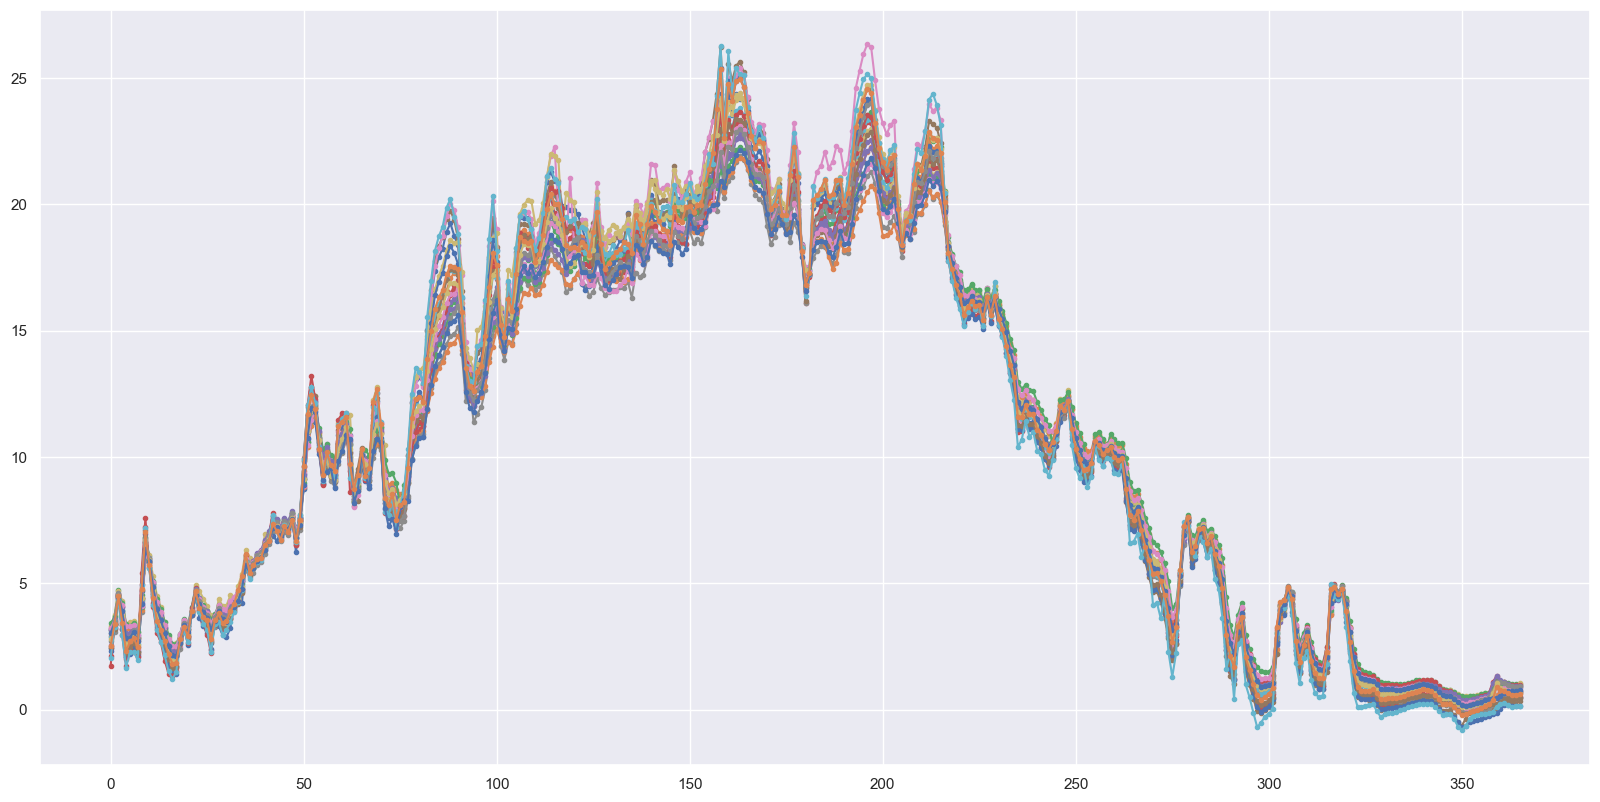

In [123]:
year=2016
a = pd.Timestamp(str(year-1) + "-12-31 23:59")
b = pd.Timestamp(str(year+1) + "-01-01 00:00")
condition = (data["datetime"] > a) & (data["datetime"]< b)
selection= data[condition]
figure(figsize=(20, 10),dpi=100)
for plotcode in codes:
    x = list(range(0, len(selection[selection["plotcode"] == plotcode]["soil_temp_15cm"])))
    plt.plot(selection[selection["plotcode"] == plotcode]["soil_temp_15cm"].values, marker= ".")

# Reformating the table for MDMI GUI: 

In [259]:
data = pd.read_csv("data_transform/prepared_daily_ts/block_2_soil_temp_daily.csv")

In [260]:
data["datetime"] = data["datetime"] + " 00:00:00"

In [263]:
for x in list(set(data["plotcode"])):
    sub = data[data["plotcode"] == x]
    sub= sub.drop(columns= ["plotcode"])
    sub.to_csv("data_transform/prepared_daily_ts/MDMI_transform/dataset2/" + str(x) + ".csv",index=False)

In [278]:
container = []
plotc = list(set(data["plotcode"]))
plotc.sort()
for x in plotc:
    sub = data[data["plotcode"] == x]
    sub= sub.drop(columns= ["plotcode"])
    sub.rename(columns={"soil_temp_05cm": "soil_temp_05cm" + "_" + str(x),"soil_temp_15cm": "soil_temp_15cm" + "_" + str(x),
                        "soil_temp_60cm":"soil_temp_60cm" + "_" + str(x),
                        "air_temp_30cm": "air_temp_30cm" + "_" + str(x),
                        "air_rel_humidiy_30cm": "air_rel_humidiy_30cm" + "_" + str(x),
                        "surface_temp_south_wes": "surface_temp_south_wes" + "_" + str(x) },inplace=True)
    container.append(sub)

In [287]:
final = container[0]
for x in container[1:]:
    final = final.merge(x,how="outer", on="datetime")


In [290]:
final.to_csv("data_transform/prepared_daily_ts/MDMI_transform/dataset2/" + "joint" + ".csv",index=False)